Text(0, 0.5, 'Gravity Component [mGal]')

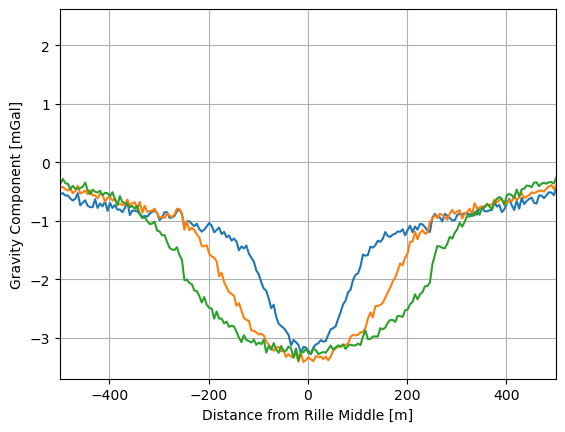

In [2]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import detrend

df = pd.read_csv("diffradii_wRegolith_forConOps.csv")

# Extract arrays
x = df["Simulation 1 x [R = 100, d = 45, Regolith = 2]"].values

gcorr1 = df["Simulation 1 gcorr [R = 100, d = 45, Regolith = 2]"].values
gcorr2 = df["Simulation 2 gcorr [R = 200, d = 45, Regolith = 2]"].values
gcorr3 = df["Simulation 3 gcorr [R = 300, d = 45, Regolith = 2]"].values

noise1 = df["Simulation 1 noise [R = 100, d = 45, Regolith = 2]"].values
noise2 = df["Simulation 2 noise [R = 200, d = 45, Regolith = 2]"].values
noise3 = df["Simulation 3 noise [R = 300, d = 45, Regolith = 2]"].values


plt.figure()
plt.plot(x, detrend(gcorr1+ noise1), label="R = 100, d = 45, Regolith = 2")
plt.plot(x, detrend(gcorr2 + noise2), label="R = 200, d = 45, Regolith = 2")
plt.plot(x, detrend(gcorr3 + noise3), label="R = 300, d = 45, Regolith = 2")
plt.xlim(-500,500)
plt.grid()
plt.xlabel("Distance from Rille Middle [m]")
plt.ylabel("Gravity Component [mGal]")

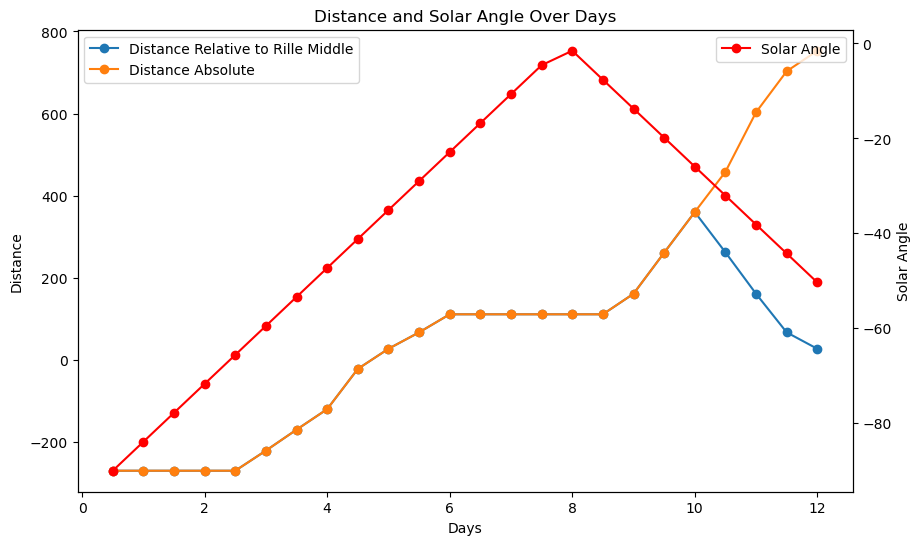

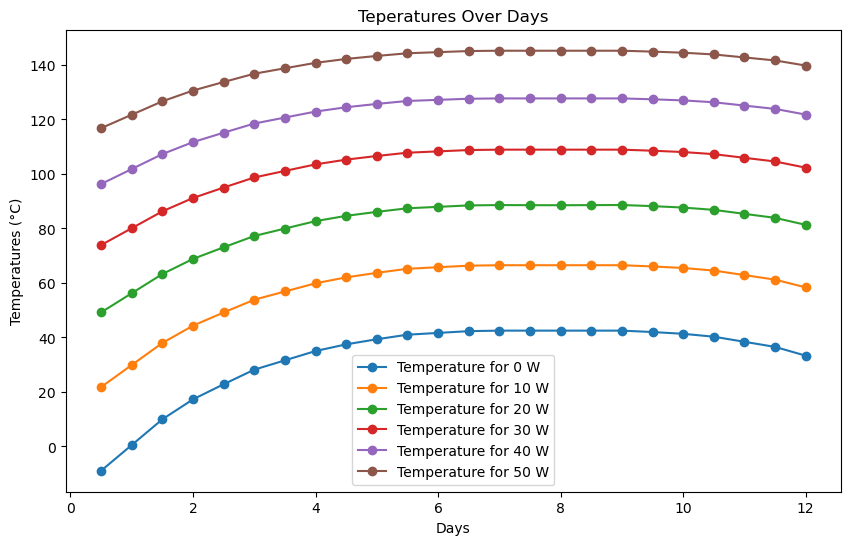

In [3]:


# From conops table:
days = np.arange(0.5, 12.5,0.5)
distance_reltorillemiddle = np.array([
    -270, -270, -270, -270, -270, -221, -170, -120, -22, 27, 67, 111, 111, 111,
    111, 111, 111, 161, 261, 360, 262, 161, 67, 27
])

distance_abs = np.array([
    -270, -270, -270, -270, -270, -221, -170, -120, -22, 27, 67, 111, 111, 111,
    111, 111, 111, 161, 261, 360, 458, 603, 703, 753
])


# WIDTH OF RILLE = 420 from -210 to 210 crosesd between day 3 and 3.5 and day 9 and 9.5 as well as 10.5 and 11
start = -90
step = (360/29.5)/2 # degrees per half an earth day
solar_angle = np.array([start + step * i for i in range(len(days))])

# since nicks table does not differentiate between -90 and 90 grad etc. 
solar_angle = -np.abs(solar_angle)

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(days, distance_reltorillemiddle, label='Distance Relative to Rille Middle', marker='o')
ax1.plot(days, distance_abs, label='Distance Absolute', marker = 'o')
ax1.set_xlabel('Days')
ax1.set_ylabel('Distance')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(days, solar_angle, label='Solar Angle', marker='o', color = "red")
ax2.set_ylabel('Solar Angle')
plt.legend()

plt.title('Distance and Solar Angle Over Days')




# From Nicks table:
measured_angles = np.array([-90, -75, -60, -45, -30, -15, 0])

# Power measurements for each watt level
temp_data = np.array([
    [-8.9, 14.3, 27.9, 36.3, 40.9, 42.5, 42.5],     # 0 Watt
    [21.8, 41.7, 53.6, 61.0, 65.1, 66.5, 66.5],     # 10 Watt
    [49.2, 66.5, 77.0, 83.7, 87.3, 88.6, 88.5],     # 20 Watt
    [73.9, 89.1, 98.5, 104.4, 107.7, 108.9, 108.9], # 30 Watt
    [96.3, 109.8, 118.3, 123.7, 126.7, 127.7, 127.7], # 40 Watt
    [116.8, 128.9, 136.6, 141.5, 144.2, 145.2, 145.2] # 50 Watt
])


temperatures = []

for row in temp_data:
    f = interp1d(measured_angles, row, kind='linear', fill_value='extrapolate')
    interpolated_row = f(solar_angle)
    temperatures.append(interpolated_row)

temperatures = np.array(temperatures)

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Days')

ax1.plot(days, temperatures[0], label='Temperature for 0 W', marker='o')
ax1.plot(days, temperatures[1], label='Temperature for 10 W', marker='o')
ax1.plot(days, temperatures[2], label='Temperature for 20 W', marker='o')
ax1.plot(days, temperatures[3], label='Temperature for 30 W', marker='o')
ax1.plot(days, temperatures[4], label='Temperature for 40 W', marker='o')
ax1.plot(days, temperatures[5], label='Temperature for 50 W', marker='o')
ax1.set_ylabel('Temperatures (°C)')
plt.legend()

plt.title('Teperatures Over Days')



df = pd.DataFrame({
    'days': days,
    'distance': distance_abs,
    'distance_reltorillemiddle': distance_reltorillemiddle,
    'solar_angle': solar_angle
})

# Add temperatures columns but prefix with 'temperatures_' for clarity and keep original base name
for i, power in enumerate([0, 10, 20, 30, 40, 50]):
    df[f'temperatures_{power}W'] = temperatures[i]

# Save to CSV
df.to_csv('interpolated_temperatures.csv', index=False)


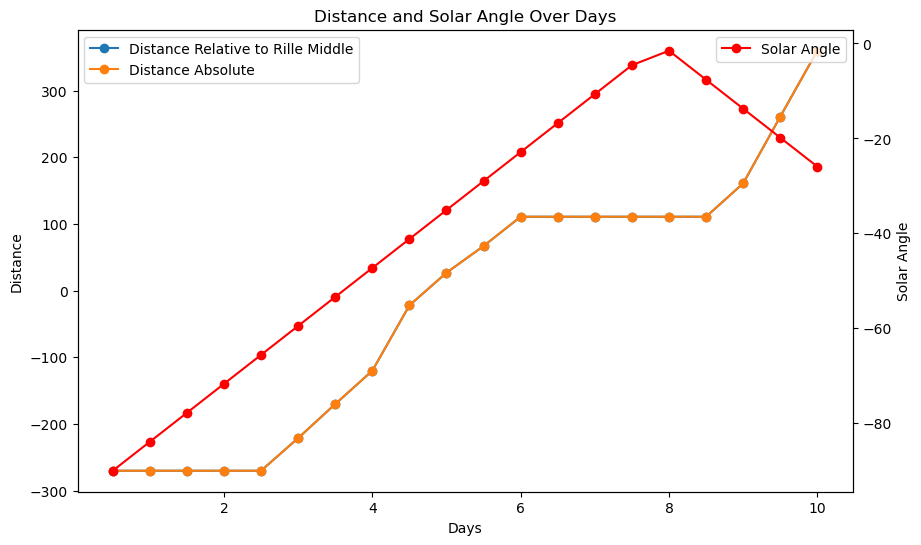

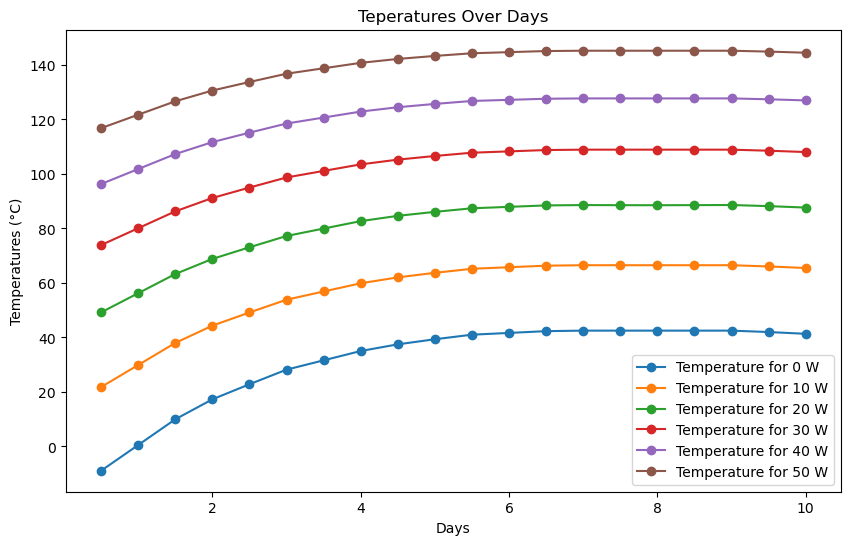

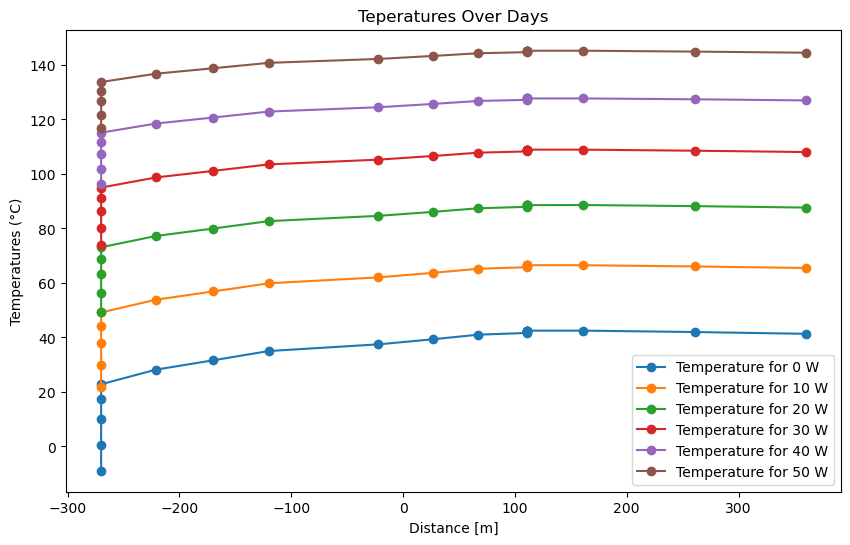

In [35]:
# ONLY FORWARD

# From conops table:
days = np.arange(0.5, 10.5,0.5)
distance_reltorillemiddle = np.array([
    -270, -270, -270, -270, -270, -221, -170, -120, -22, 27, 67, 111, 111, 111,
    111, 111, 111, 161, 261, 360
])

distance_abs = np.array([
    -270, -270, -270, -270, -270, -221, -170, -120, -22, 27, 67, 111, 111, 111,
    111, 111, 111, 161, 261, 360
])


# WIDTH OF RILLE = 420 from -210 to 210 crosesd between day 3 and 3.5 and day 9 and 9.5 as well as 10.5 and 11
start = -90
step = (360/29.5)/2 # degrees per half an earth day
solar_angle = np.array([start + step * i for i in range(len(days))])

# since nicks table does not differentiate between -90 and 90 grad etc. 
solar_angle = -np.abs(solar_angle)

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(days, distance_reltorillemiddle, label='Distance Relative to Rille Middle', marker='o')
ax1.plot(days, distance_abs, label='Distance Absolute', marker = 'o')
ax1.set_xlabel('Days')
ax1.set_ylabel('Distance')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(days, solar_angle, label='Solar Angle', marker='o', color = "red")
ax2.set_ylabel('Solar Angle')
plt.legend()

plt.title('Distance and Solar Angle Over Days')




# From Nicks table:
measured_angles = np.array([-90, -75, -60, -45, -30, -15, 0])

# Power measurements for each watt level
power = np.array([0, 10, 20, 30, 40, 50])
temp_data = np.array([
    [-8.9, 14.3, 27.9, 36.3, 40.9, 42.5, 42.5],     # 0 Watt
    [21.8, 41.7, 53.6, 61.0, 65.1, 66.5, 66.5],     # 10 Watt
    [49.2, 66.5, 77.0, 83.7, 87.3, 88.6, 88.5],     # 20 Watt
    [73.9, 89.1, 98.5, 104.4, 107.7, 108.9, 108.9], # 30 Watt
    [96.3, 109.8, 118.3, 123.7, 126.7, 127.7, 127.7], # 40 Watt
    [116.8, 128.9, 136.6, 141.5, 144.2, 145.2, 145.2] # 50 Watt
])


temperatures = []

for row in temp_data:
    f = interp1d(measured_angles, row, kind='linear', fill_value='extrapolate')
    interpolated_row = f(solar_angle)
    temperatures.append(interpolated_row)

temperatures = np.array(temperatures)

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Days')

ax1.plot(days, temperatures[0], label='Temperature for 0 W', marker='o')
ax1.plot(days, temperatures[1], label='Temperature for 10 W', marker='o')
ax1.plot(days, temperatures[2], label='Temperature for 20 W', marker='o')
ax1.plot(days, temperatures[3], label='Temperature for 30 W', marker='o')
ax1.plot(days, temperatures[4], label='Temperature for 40 W', marker='o')
ax1.plot(days, temperatures[5], label='Temperature for 50 W', marker='o')
ax1.set_ylabel('Temperatures (°C)')
plt.legend()

plt.title('Teperatures Over Days')

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Distance [m]')

ax1.plot(distance_abs, temperatures[0], label='Temperature for 0 W', marker='o')
ax1.plot(distance_abs, temperatures[1], label='Temperature for 10 W', marker='o')
ax1.plot(distance_abs, temperatures[2], label='Temperature for 20 W', marker='o')
ax1.plot(distance_abs, temperatures[3], label='Temperature for 30 W', marker='o')
ax1.plot(distance_abs, temperatures[4], label='Temperature for 40 W', marker='o')
ax1.plot(distance_abs, temperatures[5], label='Temperature for 50 W', marker='o')
ax1.set_ylabel('Temperatures (°C)')
plt.legend()

plt.title('Teperatures Over Days')


df = pd.DataFrame({
    'days': days,
    'distance': distance_abs,
    'distance_reltorillemiddle': distance_reltorillemiddle,
    'solar_angle': solar_angle
})

# Add temperatures columns but prefix with 'temperatures_' for clarity and keep original base name
for i, pow in enumerate(power):
    df[f'temperatures_{pow}W'] = temperatures[i]

# Save to CSV
df.to_csv('interpolated_temperatures.csv', index=False)



# # lets say we have 10 W: 
# temp_limit = 50
# temp_limit2 = 60
# g = interp1d(distance, temperatures[1], kind='linear', fill_value='extrapolate')
# interpolated_temps = g(x)


# indices1 = np.where(interpolated_temps <= temp_limit)[0]
# g_corr_result = g_corr_detrend[indices1]
# points = points_x[indices1]

# indices2 = np.where(interpolated_temps < temp_limit2)[0]
# h = interp1d(distance, temperatures[1], kind='linear', fill_value='extrapolate')
# g_corr_result2 = g_corr_detrend[indices2]
# points2 = points_x[indices2]

# plt.plot(points_x, g_corr_detrend, label='g_corr_detrend', color='blue')

# plt.plot(points2, g_corr_result2, marker='o',linestyle = 'None', markersize = 3, label = f"Measurable for T <= {temp_limit2} °C", color='green')
# plt.plot(points, g_corr_result,linestyle = 'None', marker='o', markersize = 3, label = f"Measurable for T <= {temp_limit} °C", color='red')
# plt.title(f"Measurement for Power = 10W")
# plt.xlabel("Index")
# plt.ylabel("Detrended Value")
# plt.xlim(-500,500)
# plt.grid(True)
# plt.legend()
# plt.show()




In [5]:


# mask = (x >= min(distance_reltorillemiddle)) & (x <= max(distance_reltorillemiddle))

# x_subset = x[mask]
# gcorr1_subset = gcorr1[mask]
# gcorr2_subset = gcorr2[mask]
# gcorr3_subset = gcorr3[mask]

# noise1_subset = noise1[mask]
# noise2_subset = noise2[mask]
# noise3_subset = noise3[mask]


# f = interp1d(x_subset, gcorr1_subset, kind='linear', fill_value='extrapolate')
# gcorr1_full = f(distance_rel_interp)

# plt.figure()
# plt.plot(distance_interp, gcorr1_full, label="R = 100, d = 45, Regolith = 2")
# plt.xlabel("absolute Distance [m]")
# plt.ylabel("Gravity Component [mGal]")


# plt.figure()
# plt.plot(x, gcorr1, label="R = 100, d = 45, Regolith = 2")
# plt.plot(x, f(x), label="R = 100, d = 45, Regolith = 2 interpolated")



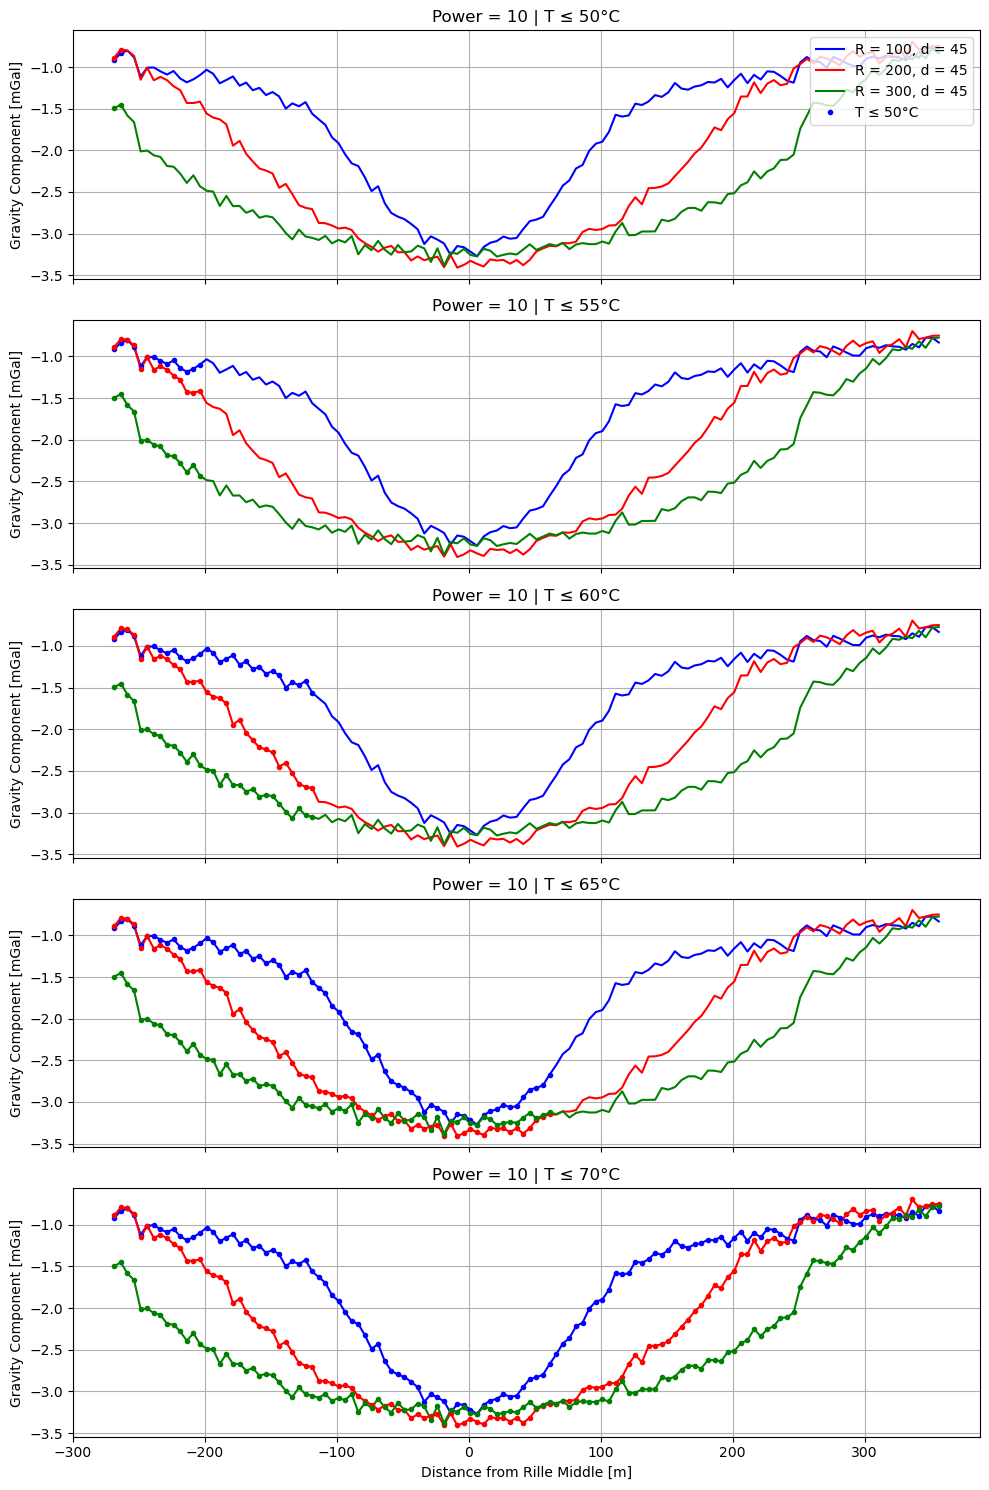

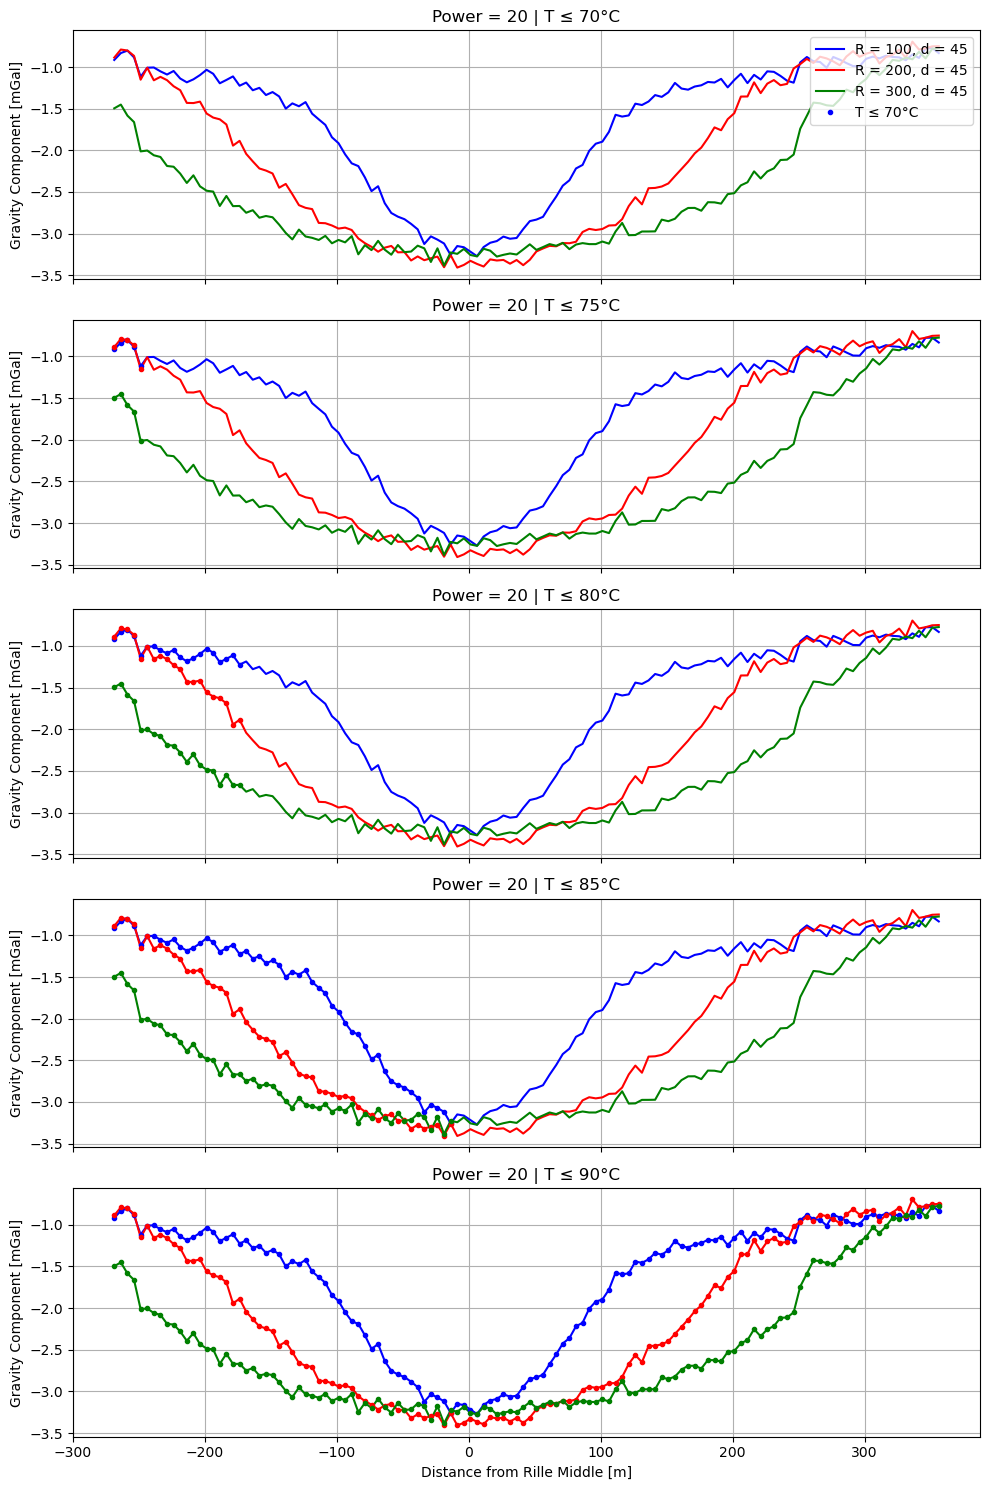

In [46]:


mask = (x >= min(distance_reltorillemiddle)) & (x <= max(distance_reltorillemiddle))
x_subset = x[mask]
signal1 = detrend(gcorr1 + noise1)[mask]
signal2 = detrend(gcorr2 + noise2)[mask]
signal3 = detrend(gcorr3 + noise3)[mask]

interpolated_temperatures = []


for i, temp in enumerate(temperatures):
    interp_func = interp1d(distance_abs, temp, kind='linear', fill_value='extrapolate')
    temp_interp = interp_func(x_subset)
    interpolated_temperatures.append(temp_interp)
#     plt.plot(x_subset, temp_interp, label=f'Temperature for {power[i]} W', marker = 'o', markersize = 1)
# plt.title("Interpolated Temperatures")
# plt.legend()
interpolated_temperatures = np.array(interpolated_temperatures)



# 10 W
def temp_plot(temp_limits, pow_idx):

    fig, axs = plt.subplots(len(temp_limits), 1, figsize=(10, 3 * len(temp_limits)), sharex=True)

    for idx, temp_limit in enumerate(temp_limits):
        # Find where temperature for 10W is below the limit
        indices = np.where(interpolated_temperatures[pow_idx] <= temp_limit)[0]

        # Extract matching signal values
        measurement1 = signal1[indices]
        measurement2 = signal2[indices]
        measurement3 = signal3[indices]
        points = x_subset[indices]

        ax = axs[idx]
        ax.plot(x_subset, signal1, label="R = 100, d = 45", color='blue')
        ax.plot(x_subset, signal2, label="R = 200, d = 45", color='red')
        ax.plot(x_subset, signal3, label="R = 300, d = 45", color='green')

        ax.plot(points, measurement1, marker='o', linestyle='None', markersize=3, label=f"T ≤ {temp_limit}°C", color='blue')
        ax.plot(points, measurement2, marker='o', linestyle='None', markersize=3, label=None, color='red')
        ax.plot(points, measurement3, marker='o', linestyle='None', markersize=3, label=None, color='green')

        ax.set_title(f"Power = {power[pow_idx]} | T ≤ {temp_limit}°C")
        ax.set_ylabel("Gravity Component [mGal]")
        ax.grid(True)

    # Final plot setup
    axs[-1].set_xlabel("Distance from Rille Middle [m]")
    axs[0].legend(loc="upper right")
    plt.tight_layout()
    plt.show()


a = temp_plot(temp_limits = [50, 55,60,65,70], pow_idx = 1)
b = temp_plot(temp_limits = [70, 75,80,85,90], pow_idx = 2)